# Logistic Regression

**Group members: Yifeng Lin, Yuan Zheng and Ziyang Guo**

## Introduction:  
The insurance industry always wants to broaden its relationships with existing customers. In this assignment, we will help the insurance company to use the output of such a logistic regression model in an attempt to improve its customer retention and sales practices base on the dataset we have. The dataset is comprised of more than 14,000 observations of 1 response variable and 14 explanatory variables.

## Data Summary:  
    1.ID            Unique customer identifier  
    2.TRAGET        Indicator of buying the new product (0 = no, 1= yes)  
    3.Loyalty       Loyalty level, from low to high (0 to 3), 99 = unclassified
    4.Age           Age in years
    5.City          Unique code per city
    6.Age_p         Age of partner in years  
    7.LOR           Length of relationship in years  
    8.LOR_m         Length of relationship in months
    9.Prod_A        Bought Product A (0=no, 1=yes)  
    10.Type_A       Type of product A  
    11.Turnover_A   Amount of money spent on Product A  
    12.Prod_B       Bought Product B (0=no, 1=yes)  
    13.Type_B       Type of product B  
    14.Turnover_B   Amount of money spent on Product B  
    15.Contract     Type of contract

In [122]:
# load the pandas & numpy libraries and matplotlib and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
data = pd.read_csv('https://raw.githubusercontent.com/Destiny-G1997/DAV-6150/main/M7_Data.csv')
data.head()

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
0,Y,99,77,66,2,0,0,0,0,0,333.561114,264.721010,2,66,3
1,Y,1,159,45,2,3,1,3,3,1,394.735699,284.904978,2,45,39
2,Y,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,2,42,27
3,Y,99,303,31,2,0,0,0,0,0,453.757916,242.341754,2,31,3
4,Y,99,306,62,2,0,0,0,0,0,384.577469,287.008370,2,62,3


## Exploratory Data Analysis

In [124]:
data.shape

(14016, 15)

In [125]:
data.dtypes

TARGET         object
loyalty         int64
ID              int64
age             int64
city            int64
LOR             int64
prod_A          int64
type_A          int64
type_B          int64
prod_B          int64
turnover_A    float64
turnover_B    float64
contract        int64
age_P           int64
lor_M           int64
dtype: object

In [126]:
# replace Y to 1 and replace N to 0
data['TARGET'] = data['TARGET'].replace("Y",1)
data['TARGET'] = data['TARGET'].replace("N",0)

In [127]:
data.dtypes

TARGET          int64
loyalty         int64
ID              int64
age             int64
city            int64
LOR             int64
prod_A          int64
type_A          int64
type_B          int64
prod_B          int64
turnover_A    float64
turnover_B    float64
contract        int64
age_P           int64
lor_M           int64
dtype: object

In [128]:
data.groupby('TARGET').mean()

,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
TARGET,,,,,,,,,,,,,,
0,39.791625,8366.446750,33.027125,-747.257125,1.081375,0.673000,2.025000,2.411625,0.74475,360.368141,371.263176,2.0,33.027125,15.976500
1,64.464428,76643.175864,39.680519,-662.669548,0.720080,0.348737,1.053191,1.263630,0.40625,404.152250,271.932769,2.0,39.680519,11.640957


we can see that the people who are older will prefer to buy the new insurance product. As for the 'LOR' and 'lor_n', we can know that if you spent less time in this relationship, you might be more likely to buy the new product.

In [129]:
#check if there are none values.
data.isnull().sum()

TARGET        0
loyalty       0
ID            0
age           0
city          0
LOR           0
prod_A        0
type_A        0
type_B        0
prod_B        0
turnover_A    0
turnover_B    0
contract      0
age_P         0
lor_M         0
dtype: int64

We need to set up two groups to separate categorical data and numerical data

In [130]:
data_num = data[['age','age_P','turnover_A','turnover_B']]

In [131]:
data_cat= data[['loyalty','city','LOR','lor_M','prod_A','type_A','prod_B','type_B','TARGET']]

In [132]:
# turn the name of columns into list
column_num=data_num.columns.to_list()
column_cat=data_cat.columns.to_list()

D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass t

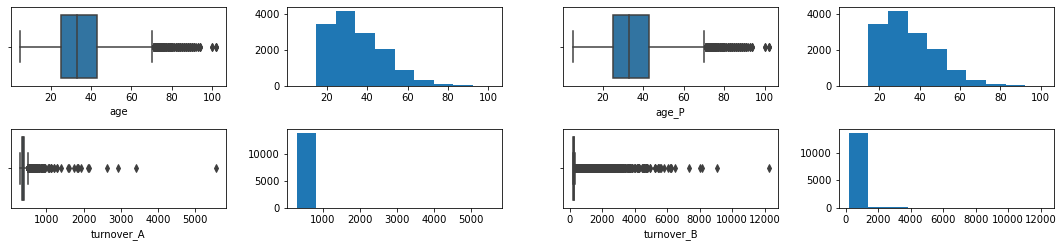

In [133]:
#show histogram and boxplot of each attribute in the numerical dataset
fig=plt.figure(figsize=(15,20))
for i in range(4):
    n=2*i
    plt.subplot(12,4,n+1)
    sns.boxplot(data_num[column_num[i]])
    plt.subplot(12,4,n+2)
    plt.hist(data_num[column_num[i]])
    
plt.tight_layout()

According to the above charts, we can see the 'turnover_A' and 'turnover_B' have a lot of outliers, so we need to do the box-cox to normalize them. The age,age_P are Right-skewed Distribution observed, they all have right outliers.

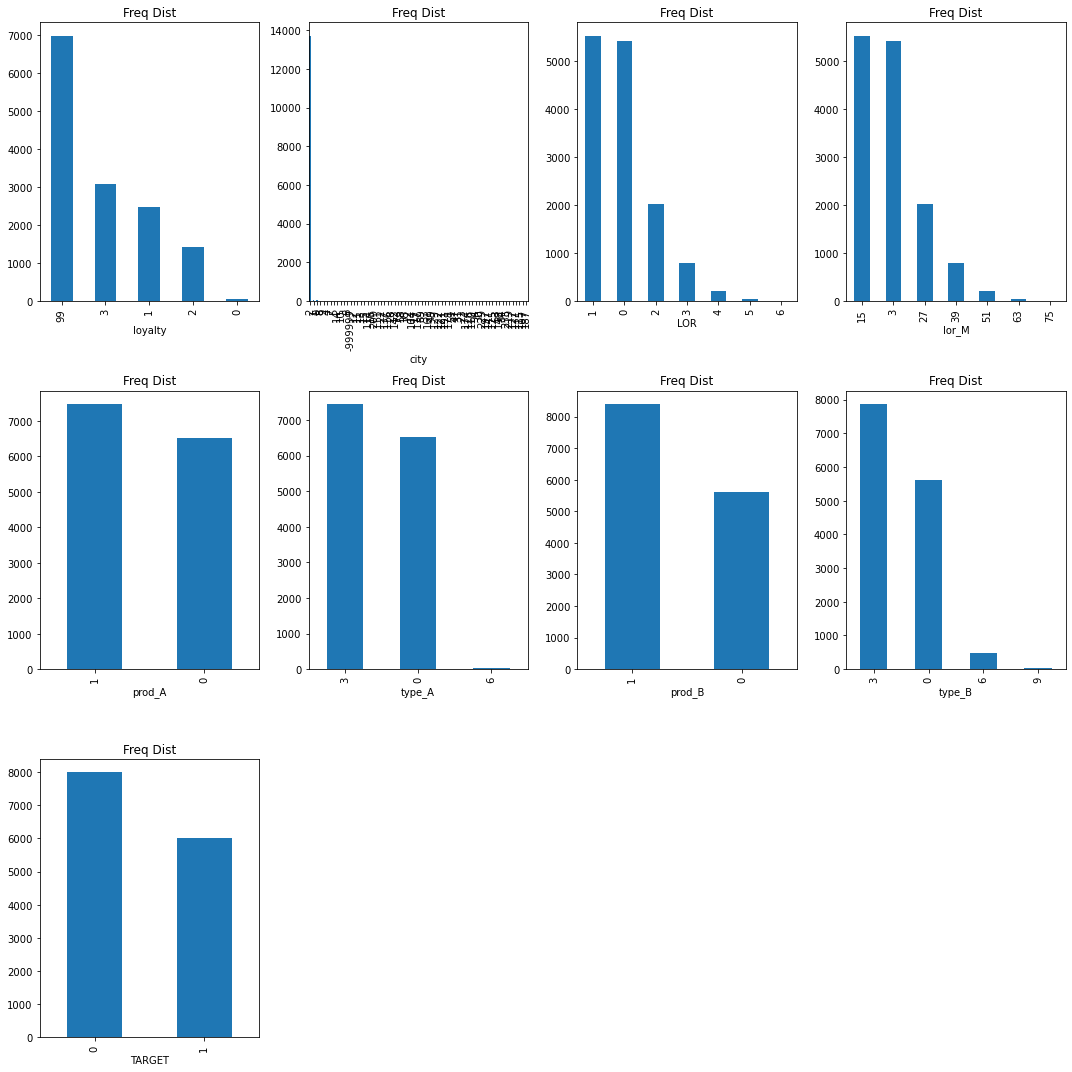

In [134]:
# show barplot of each attribute in the categorical dataset
fig=plt.figure(figsize=(15,15))
for i in range(9):
    plt.subplot(3,4,i+1)
    data_cat[column_cat[i]].value_counts().plot.bar(title = "Freq Dist")
    plt.xlabel(column_cat[i])
plt.tight_layout()

In [86]:
data['city'].value_counts()

2      13720
1         28
0         26
8         21
9         20
       ...  
127        1
131        1
115        1
107        1
187        1
Name: city, Length: 65, dtype: int64

- In the chart of 'loyalty', the '99' appears mostly followed by '3', '1', and '2', '0' appears the lowest number of times.
- In the LOR, the '1' appears most and '6' appears least.
- In the Lor_m, the '15' appears most and '75' appears least
- In the prod_A, there are nearly 7500 people who have bought product A and there are about 6500 people who have not.
- In the type_A, there are nearly 7470 people have bought the type '3', and only 30 people bought the type '6'.
- In the prod_B, there are nearly 8400 people have bought product B and there are about 5600 people who have not.
- In the type_B, type 3 appears the most number, and type 9 appears the least number.
- In the TARGET, we find that there are nearly 6000 people have bought the new product and other 8000 have not.
- In the city, most cities gathered at the '2'.


## Data Preparation

For data preparation, we transfer the 'TARGET' to dummy variable. And we will apply box cox function to finish normalization for 'turnover A' and 'turnover B'. If there are any missing values, we will apply KNN the fill missing values.

In [87]:
# Load boxcox function from scipy.stats
from scipy.stats import boxcox
from scipy import stats
data.describe()

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
count,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.0,14016.000000,14016.000000
mean,0.429224,50.381778,37672.440068,35.882920,-710.950128,0.926299,0.533818,1.607877,1.918878,0.599458,379.161320,328.628207,2.0,35.882920,14.115582
std,0.494983,48.471790,44855.639209,12.974634,26702.329184,0.965212,0.498873,1.508991,1.686038,0.490026,92.612207,475.616525,0.0,12.974634,11.582550
min,0.000000,0.000000,1.000000,5.000000,-999999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,300.095909,191.962852,2.0,5.000000,3.000000
25%,0.000000,2.000000,6741.500000,25.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.919412,219.406925,2.0,25.000000,3.000000
50%,0.000000,3.000000,13514.500000,33.000000,2.000000,1.000000,1.000000,3.000000,3.000000,1.000000,367.891493,237.656757,2.0,33.000000,15.000000
75%,1.000000,99.000000,62738.000000,43.000000,2.000000,1.000000,1.000000,3.000000,3.000000,1.000000,399.744923,264.131538,2.0,43.000000,15.000000
max,1.000000,99.000000,151811.000000,102.000000,235.000000,6.000000,1.000000,6.000000,9.000000,1.000000,5568.784139,12249.084770,2.0,102.000000,75.000000


In [88]:
# using boxcox to deal with some outliers and finish normalization
x1 = data.turnover_A
y1, fixed_x1 = stats.boxcox(x1)
data['turnover_A'] = pd.DataFrame(y1)

x2 = data.turnover_B
y2, fixed_x2 = stats.boxcox(x2)
data['turnover_B'] = pd.DataFrame(y2)

data

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
0,1,99,77,66,2,0,0,0,0,0,0.439103,0.3402,2,66,3
1,1,1,159,45,2,3,1,3,3,1,0.439103,0.3402,2,45,39
2,1,1,220,42,2,2,1,3,6,1,0.439103,0.3402,2,42,27
3,1,99,303,31,2,0,0,0,0,0,0.439103,0.3402,2,31,3
4,1,99,306,62,2,0,0,0,0,0,0.439103,0.3402,2,62,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14011,1,99,151601,30,2,0,0,0,0,0,0.439103,0.3402,2,30,3
14012,1,1,151634,27,2,2,1,3,3,1,0.439103,0.3402,2,27,27
14013,1,99,151679,26,2,0,0,0,0,0,0.439103,0.3402,2,26,3
14014,1,1,151804,75,2,1,1,3,3,1,0.439103,0.3402,2,75,15


## Prepped Data Review

After data preparation, we need to rerun EDA and to see the change

In [89]:
#seperate categorical data and numercial data
data_num = data[['age','age_P','turnover_A','turnover_B']]
data_cat= data[['loyalty','city','LOR','lor_M','prod_A','type_A','prod_B','type_B','TARGET']]

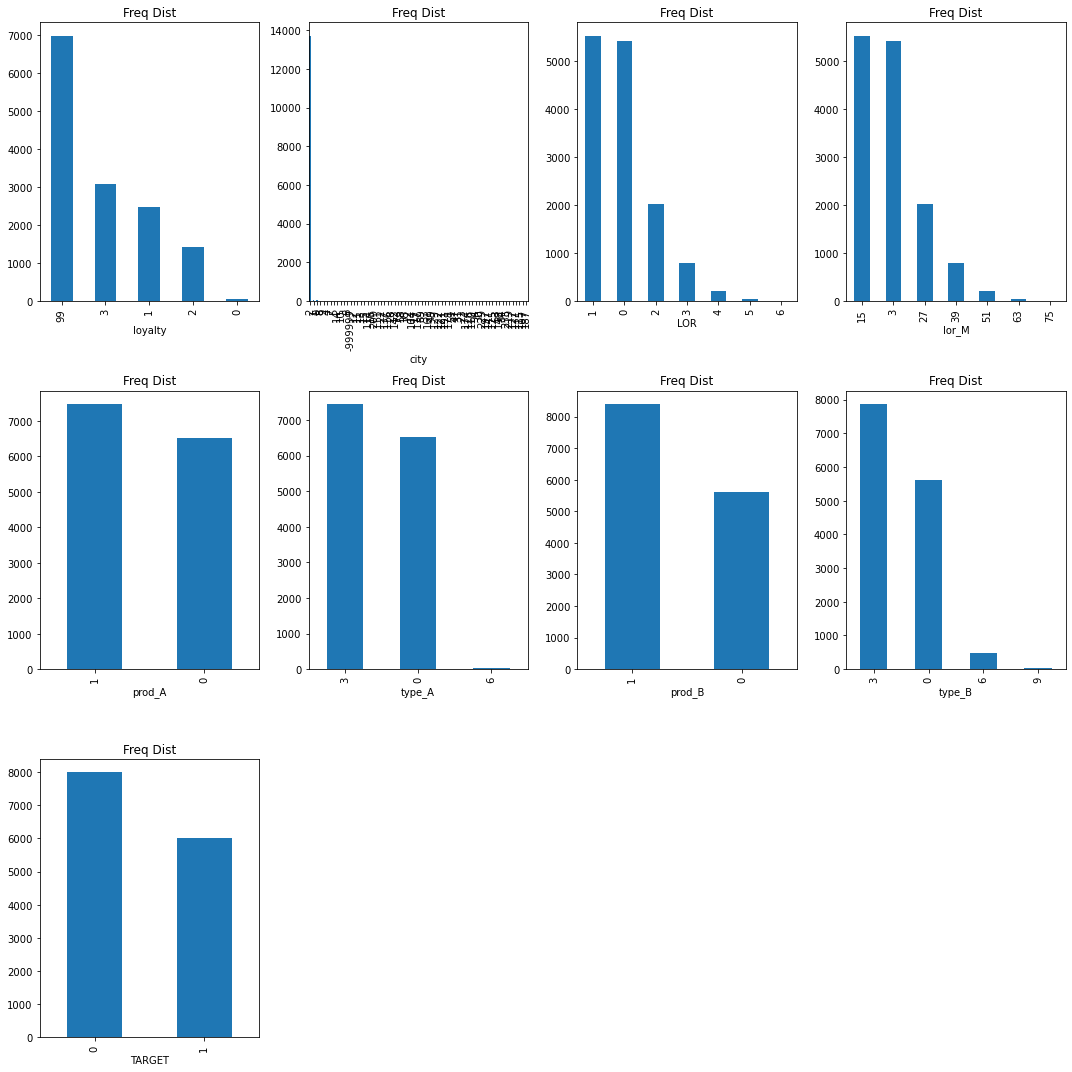

In [135]:
# show barplot of each attribute in the categorical dataset
fig=plt.figure(figsize=(15,15))
for i in range(9):
    plt.subplot(3,4,i+1)
    data_cat[column_cat[i]].value_counts().plot.bar(title = "Freq Dist")
    plt.xlabel(column_cat[i])
plt.tight_layout()

D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass t

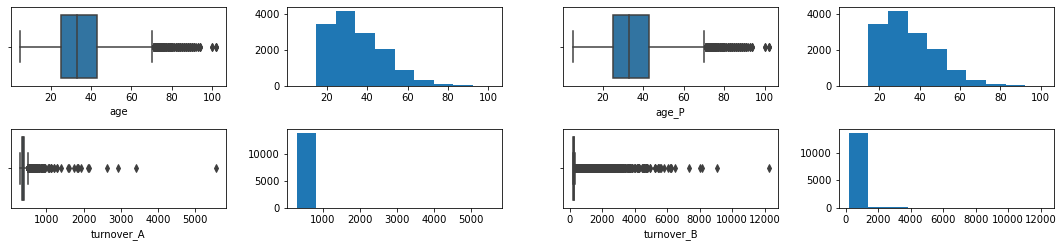

In [136]:
#show histogram and aboxplot of each attributes
fig=plt.figure(figsize=(15,20))
for i in range(4):
    n=2*i
    plt.subplot(12,4,n+1)
    sns.boxplot(data_num[column_num[i]])
    plt.subplot(12,4,n+2)
    plt.hist(data_num[column_num[i]])
    
plt.tight_layout()

After re-EDA, we can see that there are fewer outliers in 'turnover_A' and 'turnover_B' than before. We decide to set 3 groups/models based on the attributes we have right now for regression modeling afterward. According to the domain knowledge we have, we set out the first group including attributes that are relevant to product A, age of partner in years, and indicator of buying the new product (0 = no, 1= yes). The second model includes attributes that are relevant with product B, age of partner in years, and indicator of buying the new product (0 = no, 1= yes). The last model includes loyalty level, age in years, unique code per city, type of contract, length of relationship in years, and indicator of buying the new product (0 = no, 1= yes). The first and second model is to compare the correlations between 2 product-relevant attributes with TARGET. The last model is to compare the personal background info attributes' correlations to Target with product relevant info.  
Model 1: prod_A, type_A, turnover_A, age_P, TARGET.  
Model 2: prod_B, type_B, turnover_B, age_P, TARGET.  
Model 3: loyalty, age, city, contract, LOR, TARGET

## Regression Modeling

**Model 1**

In [137]:
# load the LogisticRegression() function from sklearn's 'linear_model' sub-library
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [138]:
X1 = data[['prod_A','type_A','turnover_A','age_P']].copy()
Y1 = data.TARGET

In [139]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1, test_size = 0.2, random_state = 12)

In [140]:
X1_train.shape, Y1_train.shape

((11212, 4), (11212,))

In [141]:
Y1_train.values.sum()

4780

In [142]:
# calculate the null error rate
ner1 = 1 - ( Y1_train.values.sum() / Y1_train.shape[0])
ner1

0.5736710667142347

In [143]:
# We're using the LogisticRegression() method for this model
model1 = LogisticRegression()
model1.fit(X1_train, Y1_train)

LogisticRegression()

In [144]:
model1.score(X1_train, Y1_train)

0.7303781662504459

The null error rate for our data is 57.3%. The model we just created has an accuracy score of 70.5%. So, our model 1 appers to be useful. 

**Model 2**

In [145]:
X2 = data[['prod_B','type_B','turnover_B','age_P']].copy()
Y2 = data.TARGET

In [146]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2,Y2, test_size = 0.2, random_state = 12)

In [147]:
Y2_train.values.sum()

4780

In [148]:
ner2 = 1 - ( Y2_train.values.sum() / Y2_train.shape[0])
ner2

0.5736710667142347

In [149]:
model2 = LogisticRegression()
model2.fit(X2_train, Y2_train)

LogisticRegression()

In [150]:
model2.score(X2_train, Y2_train)

0.720656439529076

The null error rate for our data is 57.3%. The model we just created has an accuracy score of 71.5%. So, our model 2 appers to be useful.

**Model 3**

In [151]:
X3 = data[['loyalty', 'age', 'city', 'contract', 'LOR']].copy()
Y3 = data.TARGET

In [152]:
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3,Y3, test_size = 0.2, random_state = 12)

In [153]:
Y3_train.values.sum()

4780

In [154]:
ner3 = 1 - ( Y3_train.values.sum() / Y3_train.shape[0])
ner3

0.5736710667142347

In [155]:
model3 = LogisticRegression()
model3.fit(X3_train, Y3_train)

LogisticRegression()

In [156]:
model3.score(X3_train, Y3_train)

0.6078308954691402

The null error rate for our data is 57.3%. The model we just created has an accuracy score of 60.7%. So, our model 3 appers to be useful.

## Select Models
We now need to predict class labels for the test set. We will also generate the class probabilities, just to take a look.

In [157]:
# predict class labels for the test set
predicted1 = model1.predict(X1_test)
predicted1

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [158]:
# generate class probabilities
probs1 = model1.predict_proba(X1_test)
probs1

array([[0.40477928, 0.59522072],
       [0.57985531, 0.42014469],
       [0.78447505, 0.21552495],
       ...,
       [0.84809049, 0.15190951],
       [0.10582273, 0.89417727],
       [0.45011724, 0.54988276]])

In [159]:
# predict class labels for the test set
predicted2 = model2.predict(X2_test)
predicted2

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [160]:
# generate class probabilities
probs2 = model2.predict_proba(X2_test)
probs2

array([[0.32006788, 0.67993212],
       [0.49954568, 0.50045432],
       [0.62482541, 0.37517459],
       ...,
       [0.80670531, 0.19329469],
       [0.2782174 , 0.7217826 ],
       [0.48455773, 0.51544227]])

In [161]:
# predict class labels for the test set
predicted3 = model3.predict(X3_test)
predicted3

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [162]:
# generate class probabilities
probs3 = model3.predict_proba(X3_test)
probs3

array([[0.46337135, 0.53662865],
       [0.42857391, 0.57142609],
       [0.59475473, 0.40524527],
       ...,
       [0.42423057, 0.57576943],
       [0.47272568, 0.52727432],
       [0.49174217, 0.50825783]])

As you can see, the classifier is predicting a 1 (having an affair) any time the probability in the second column is greater than 0.5.

### Model Evaluation
Now let's generate some evaluation metrics.

In [163]:
# generate evaluation metrics
from sklearn import metrics 
print(metrics.accuracy_score(Y1_test, predicted1))
print(metrics.roc_auc_score(Y1_test, probs1[:, 1]))

0.7471469329529244
0.821943522554653


In [164]:
print(metrics.confusion_matrix(Y1_test, predicted1))
print(metrics.classification_report(Y1_test, predicted1))

[[1291  277]
 [ 432  804]]
              precision    recall  f1-score   support

           0       0.75      0.82      0.78      1568
           1       0.74      0.65      0.69      1236

    accuracy                           0.75      2804
   macro avg       0.75      0.74      0.74      2804
weighted avg       0.75      0.75      0.74      2804



In [165]:
print(metrics.accuracy_score(Y2_test, predicted2))
print(metrics.roc_auc_score(Y2_test, probs2[:, 1]))

0.7300285306704708
0.7791308574400634


In [166]:
print(metrics.confusion_matrix(Y2_test, predicted2))
print(metrics.classification_report(Y2_test, predicted2))

[[1290  278]
 [ 479  757]]
              precision    recall  f1-score   support

           0       0.73      0.82      0.77      1568
           1       0.73      0.61      0.67      1236

    accuracy                           0.73      2804
   macro avg       0.73      0.72      0.72      2804
weighted avg       0.73      0.73      0.73      2804



In [167]:
print(metrics.confusion_matrix(Y3_test, predicted3))
print(metrics.classification_report(Y3_test, predicted3))

[[993 575]
 [508 728]]
              precision    recall  f1-score   support

           0       0.66      0.63      0.65      1568
           1       0.56      0.59      0.57      1236

    accuracy                           0.61      2804
   macro avg       0.61      0.61      0.61      2804
weighted avg       0.62      0.61      0.61      2804



From above, we can see that the accuracies of model1 and model2 are higher than model3, so model1 and model2 have a better predictive effect on the test data than model3. And for precision, recall and f1-score, model1 and model2 are close.For auc, model2 is higher than model1, so model 2 is the best model among the 3 models.

### Cross-Validation
Now let's try 10-fold cross-validation, to see if the accuracy holds up more rigorously.

In [168]:
# load the cross_val_score function from the sklearn.model_selection module
from sklearn.model_selection import cross_val_score
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(model2, X2_train, Y2_train, scoring='accuracy', cv=10)
print(scores)
print (scores.mean())

[0.69964349 0.73885918 0.71900089 0.72167707 0.72613738 0.72167707
 0.72524532 0.70651204 0.72256913 0.7279215 ]
0.7209243084144695


Looks good. It's still performing at 71% accuracy.

### Apply Our Preferred Model to the Testing Subset

In [169]:
# predict class labels for the test set
predicted2 = model2.predict(X2_test)
predicted2

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [170]:
# generate class probabilities
probs2 = model2.predict_proba(X2_test)
probs2

array([[0.32006788, 0.67993212],
       [0.49954568, 0.50045432],
       [0.62482541, 0.37517459],
       ...,
       [0.80670531, 0.19329469],
       [0.2782174 , 0.7217826 ],
       [0.48455773, 0.51544227]])

## Conclusions

Although model 2 has the best predictive effect on the unseen data, but its accuracy is not very high, this indicates that we still have room for improving this model, for this assignment, mainly for data preparation and selection of independent variables.